In [1]:
import os
import pandas as pd
import numpy as np
import keras
from keras import layers
import tensorflow as tf
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

2024-05-16 11:58:23.023722: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 11:58:25.084897: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 11:58:29.698841: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 11:58:42.296325: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
os.getcwd()

'/home/kevin/traffic_signs/roadtrafficsigns'

In [3]:
os.chdir('/home/kevin')

In [4]:
dataset_directory = "trafficsigns_dataset"

#Gets class names by listing directories
class_names = sorted(os.listdir(dataset_directory))  # Ensure it's sorted to match the order used by TensorFlow
print("Class names:", class_names)

#prints class name and corresponding index
print("Class names and their corresponding indices:")
for index, name in enumerate(class_names):
    print(f"Class {index}: {name}")

Class names: ['diamond', 'hex', 'round', 'square', 'triangle']
Class names and their corresponding indices:
Class 0: diamond
Class 1: hex
Class 2: round
Class 3: square
Class 4: triangle


In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# target size being the size of the images
train_generator = datagen.flow_from_directory(
    'trafficsigns_dataset',
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'trafficsigns_dataset',
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

Found 2946 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [7]:
# train_generator = ImageDataGenerator(rescale=1./255, data_format='channels_last')
# validation_generator = ImageDataGenerator(rescale=1./255, data_format='channels_last')

In [8]:
import scipy
from scipy.ndimage import gaussian_filter, binary_dilation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [9]:
#confirming shape of images
batch_size = 32
train_dataset = train_generator[0]

# Print the shapes of the images and labels
print("Images shape:", train_dataset[0].shape)
print("Labels shape:", train_dataset[1].shape)

Images shape: (32, 28, 28, 1)
Labels shape: (32, 5)


In [ ]:
# building a CNN model for image classification 
# using Keras.
import warnings
warnings.filterwarnings('ignore')

num_classes = 5

#first convolutional layer extracting low level features, second conv. layer for more
#complex patterns. Both using ReLU for non-linearity
#pooling layers to reduce spatial dimensions
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20, verbose=0,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

2024-05-16 11:59:36.129842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-16 11:59:36.188025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-16 11:59:39.189803: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-16 11:59:39.200799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-16 11:59:41.736482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-16 11:59:41.749899: W tensorflow/core/framework/local_rendezvous.cc:404]

### plot Validation Loss and Training Loss

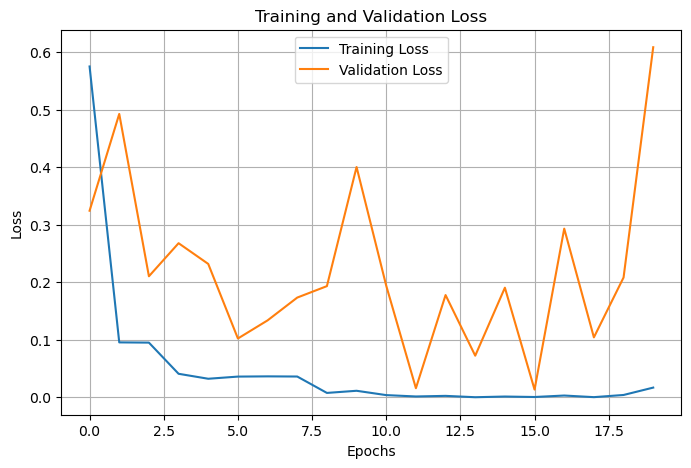

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Validation loss instable, not decreasing smoothly suggests overfitting and that model is sensitive to small changes. Possibly because of noisy or insufficient data or model too complex. Possible approaches to remedy:
    early stopping
    regularisation
    data augmentation
    hyperparameter tuning
    cross-validation

### Plot Validation Accuracy and Training Accuracy

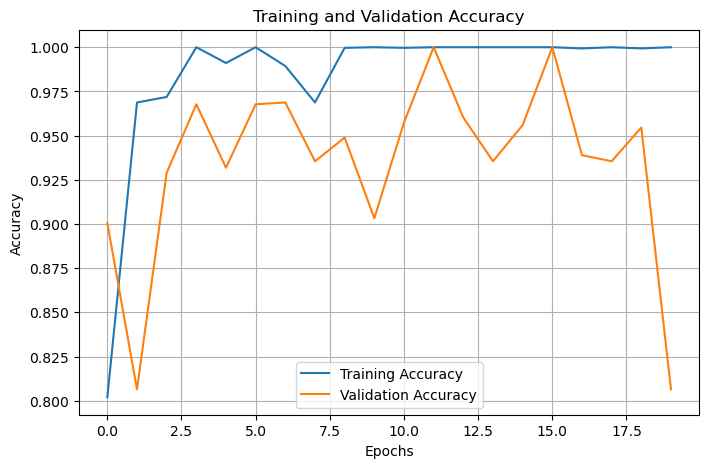

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.grid(True)
plt.show()

### Validation Accuracy

In [13]:
model.evaluate(validation_generator)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9665 - loss: 0.1953


[0.23688292503356934, 0.9482993483543396]

In [14]:
from tensorflow.keras.preprocessing import image
import random

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array /= 255.0

    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [15]:
def choose_random_images_from_subfolders(directory, num_images=3):
    all_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png')):
                all_images.append(os.path.join(root, file))
    
    #Randomly select num_images from the list of all images
    if len(all_images) >= num_images:
        chosen_images = random.sample(all_images, num_images)
    else:
        chosen_images = all_images
    
    return chosen_images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


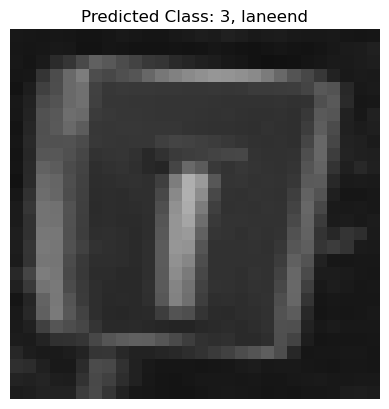

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


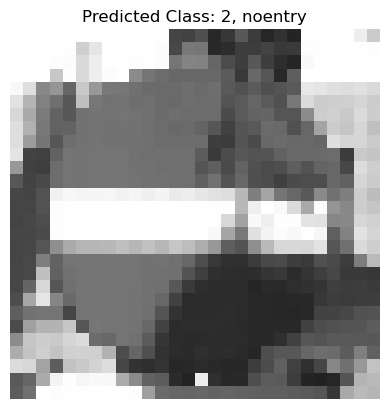

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


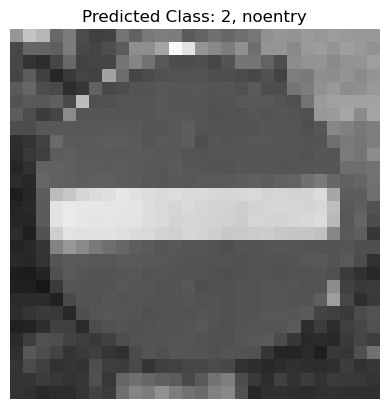

In [16]:

def load_and_preprocess_image(img_path):
    #load image, normalise
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)

    img_array /= 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def choose_random_images_from_subfolders(directory, num_images=3):
    all_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png')):
                all_images.append(os.path.join(root, file))
    if len(all_images) >= num_images:
        chosen_images = random.sample(all_images, num_images)
    else:
        chosen_images = all_images
    return chosen_images


test_directory = 'trafficsigns_dataset'

#Choose 3 images at random from one of the subfolders
random_images = choose_random_images_from_subfolders(test_directory)

for img_path in random_images:
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    #Display image with predicted class and folder name
    img = image.load_img(img_path)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    folder_name = os.path.basename(os.path.dirname(img_path))
    plt.title(f"Predicted Class: {predicted_class[0]}, {folder_name}")
    plt.show()

### Hyperparameter tuning

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from kerastuner import HyperModel

class MyHyperModel(HyperModel):
    def __init__(self, num_classes):
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential([
            Conv2D(
                filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
                kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
                activation='relu',
                input_shape=(28, 28, 1)
            ),
            MaxPooling2D(2, 2),
            Conv2D(
                filters=hp.Int('filters_2', min_value=64, max_value=256, step=64),
                kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
                activation='relu'
            ),
            MaxPooling2D(2, 2),
            Flatten(),
            Dense(
                units=hp.Int('units', min_value=256, max_value=1024, step=256),
                activation='relu'
            ),
            Dense(self.num_classes, activation='softmax')
        ])
        
        model.compile(
            optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

hypermodel = MyHyperModel(num_classes=5)

In [18]:
# #Run once! Takes a long time!!!
# from kerastuner.tuners import Hyperband

# tuner = Hyperband(
#     hypermodel,
#     objective='val_accuracy',
#     max_epochs=10,
#     directory='traffic_signs',
#     project_name='hyperparam_tuning'
# )

# tuner.search(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=20,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // validation_generator.batch_size,
#     verbose=0
# )

### Optimal hyperparameters - uncomment this and above to run

In [19]:
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# Optimum units for first layer: {best_hps.get('units')} Optimal optimizer: {best_hps.get('optimizer')}.
# """)

# # Build the model with the best hyperparameters.
# model = tuner.hypermodel.build(best_hps)
# model.summary()

NameError: name 'tuner' is not defined

In [20]:
#Training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest' 
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [21]:
train_generator = train_datagen.flow_from_directory(
    'trafficsigns_dataset',
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale', 
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'trafficsigns_dataset', 
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale', 
    class_mode='categorical',
    subset='validation'
)

Found 3681 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [22]:
import warnings
warnings.filterwarnings('ignore')

num_classes = 5

model = Sequential([
    Conv2D(256, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20, verbose=0,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

2024-05-16 12:02:10.026386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-16 12:02:10.052508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-16 12:02:20.963468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-16 12:02:20.983911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-16 12:02:32.629666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-16 12:02:32.650220: W tensorflow/core/framework/local_rendezvous.cc:404]

### Training and Validation Loss (augmentation)

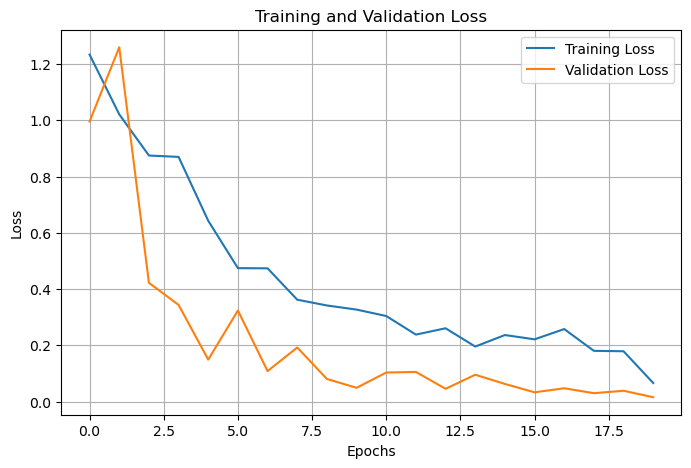

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

We can see augmentation produces a more stable model with more balanced training and validation performance. 

### Training and Validation Accuracy (augmentation)

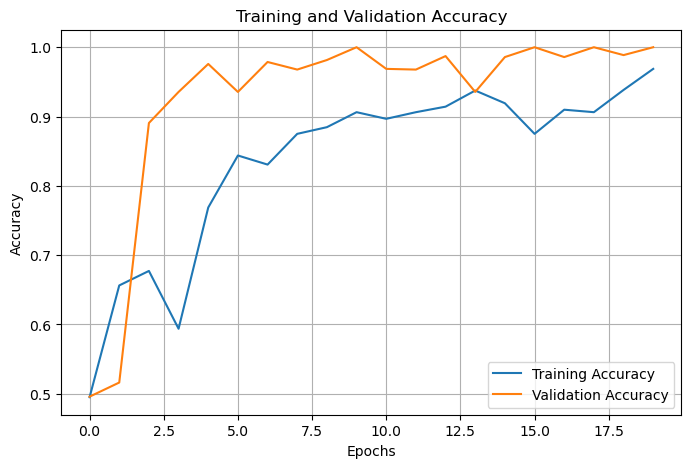

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Change 'loss' to 'accuracy'
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Change 'val_loss' to 'val_accuracy'
plt.title('Training and Validation Accuracy')  # Change title to Accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # Change Y-axis label to Accuracy
plt.legend()
plt.grid(True)
plt.show()

In [25]:
model.evaluate(validation_generator)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9883 - loss: 0.0374


[0.037609610706567764, 0.9891156554222107]

### Type Classification Model

In [27]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image

import zipfile
with zipfile.ZipFile('./types.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

sign_type_class_names = ['rightofway','stop','bicycle','limitedtraffic','noentry','noparking','roundabout','speed','trafficdirective','traveldirection','continue',
                         'crossing','laneend','parking','giveway','warning']

import glob
image_list = []
for filepath in glob.glob('./types/*/*.png', recursive=True):
    filename = filepath.split('/')[-1]
    sign_type = filepath.split('/')[-2]
    image_list.append((filepath, sign_type))

data = pd.DataFrame(data=image_list, columns=['image_path', 'sign_type'])

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

In [28]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="sign_type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image_path",
        y_col="sign_type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


In [29]:
reg_lambda = 0.001
OUTPUT_CLASSES = 16

model_leNet = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),


    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

In [30]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history = model_leNet.fit(train_generator,
                                    validation_data = validation_generator,
                                    epochs=100, verbose=0)

In [31]:
model_leNet.save('sign_type.keras')

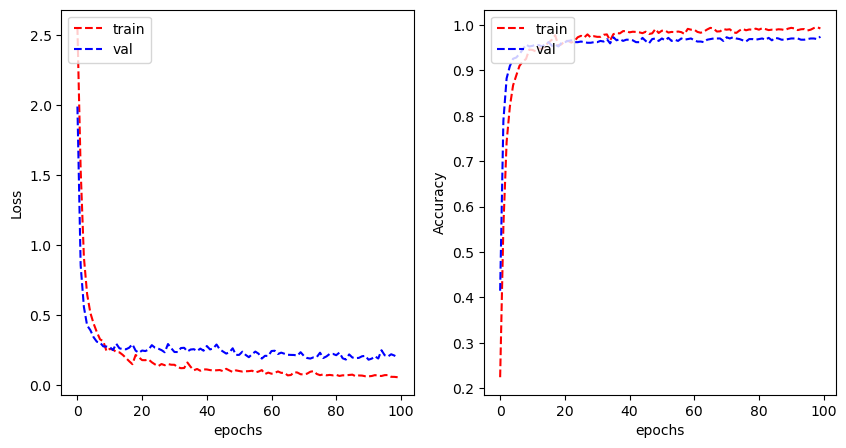

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], 'r--')
plt.plot(history.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

### Data Augmentation

In [68]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                  rotation_range=15, width_shift_range=0.2,
                                  height_shift_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="sign_type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image_path",
        y_col="sign_type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


In [69]:
model_leNet_aug = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),


    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])


In [73]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_aug.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history = model_leNet_aug.fit(train_generator,
                                    validation_data = validation_generator,
                                    epochs=100, verbose=0)

In [74]:
model_leNet_aug.save('sign_type2.keras')

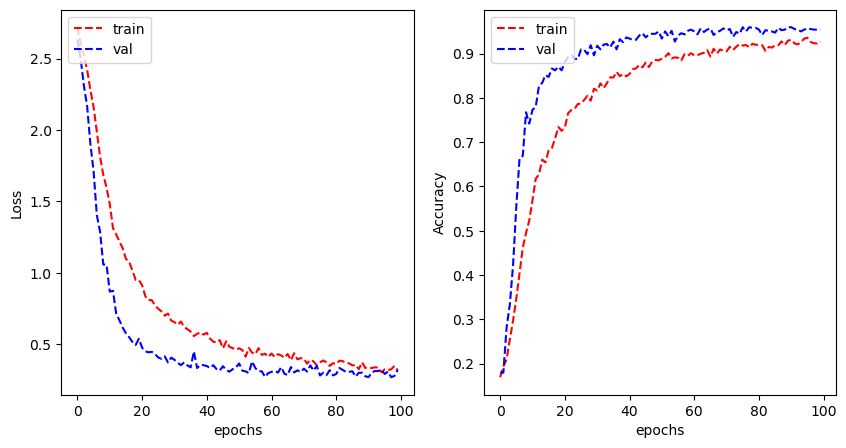

In [70]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], 'r--')
plt.plot(history.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#
plt.show()

In [71]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_data,
    directory = './',
    x_col = 'image_path',
    y_col = 'sign_type',
    target_size = (28, 28),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 740 validated image filenames belonging to 16 classes.


In [75]:
model_leNet_aug.evaluate(test_generator)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - categorical_accuracy: 0.9767 - loss: 0.1797


[0.19577309489250183, 0.9770269989967346]

### Independent Evaluation

In [ ]:
ind_directory = "trafficsigns_dataset"

In [36]:
datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Setting 20% of the data for validation
)

#### Converting images

In [66]:
# #just need to run once
# from PIL import Image

# def resize_and_convert_images(directory, output_directory, size=(28, 28)):
#     if not os.path.exists(output_directory):
#         os.makedirs(output_directory)
    
#     # goes through directory and sub directories
#     for root, dirs, files in os.walk(directory):
#         for filename in files:
#             if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                
#                 file_path = os.path.join(root, filename)
                
#                 with Image.open(file_path) as img:
#                     # Resize the image
#                     img = img.resize(size)
#                     # Convert the image to greyscale
#                     img = img.convert('L')
                    
#                     relative_path = os.path.relpath(root, directory)
#                     output_path = os.path.join(output_directory, relative_path)
#                     if not os.path.exists(output_path):
#                         os.makedirs(output_path)
                    
#                     output_file_path = os.path.join(output_path, filename)
                    
#                     img.save(output_file_path)
#                     print(f'Processed {filename}')

# input_directory = 'independant_evaluation_dataset'
# output_directory = 'evaluation_images'
# resize_and_convert_images(input_directory, output_directory)

Processed raoundabout.png
Processed noparking_1.png
Processed bicycle_1.png
Processed noentry_2.png
Processed noentry_4.png
Processed noentry_3.png
Processed noentry_1.png
Processed limitedtraffic_1.png
Processed limitedtraffic_2.png
Processed traveldirective_2.png
Processed traveldirective_3.png
Processed traveldirective_1.png
Processed traveldirective_4.png
Processed traveldirection_3.png
Processed traveldirection_1.png
Processed traveldirection_2.png
Processed traveldirection_5.png
Processed traveldirection_4.png
Processed speed_2.png
Processed speed_3.png
Processed speed_1.png
Processed speed_4.png
Processed giveway_1.png
Processed warning_3.png
Processed warning_2.png
Processed warning_1.png
Processed warning_5.png
Processed warning_4.png
Processed parking_1.png
Processed parking_2.png
Processed continue_1.png
Processed 222809.png
Processed 222921.png
Processed crossing_1.png
Processed stop_1.png
Processed rightofway_1.png


### Predicting Image Class

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#load, normalise, add to array
img_path = 'evaluation_images/diamond/rightofway/rightofway_1.png'
img = load_img(img_path, target_size=(28, 28))
img_array = img_to_array(img)
img_array /= 255.0
img_array = np.expand_dims(img_array, axis=0)


assert img_array.shape == (1, 28, 28, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


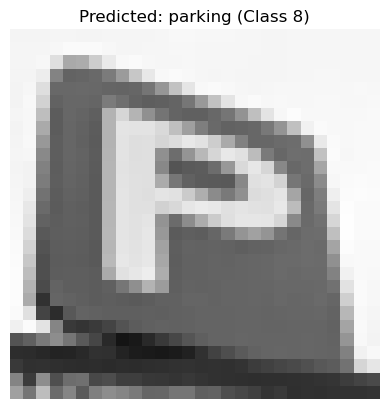

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


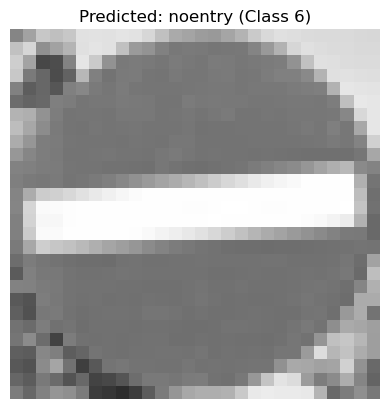

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


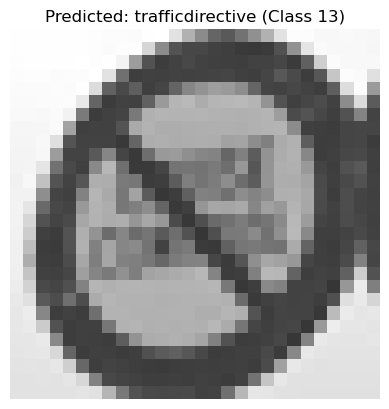

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


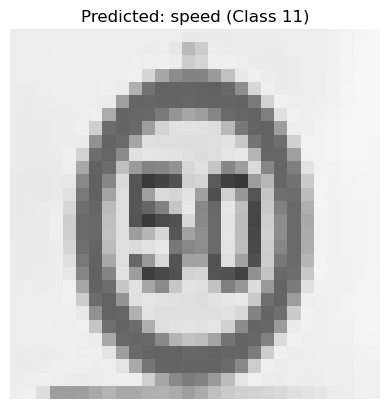

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


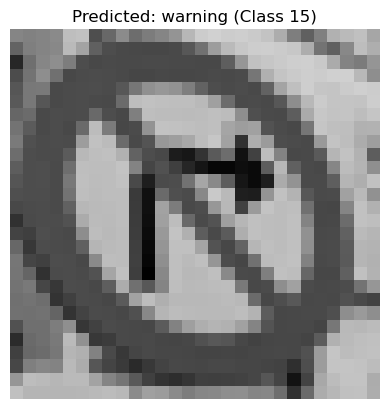

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


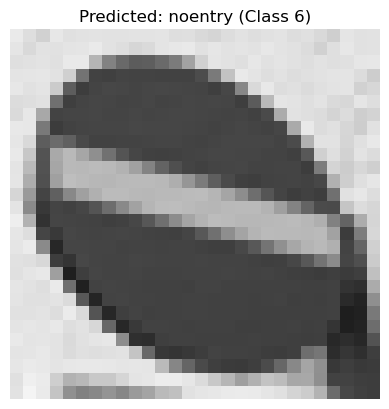

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


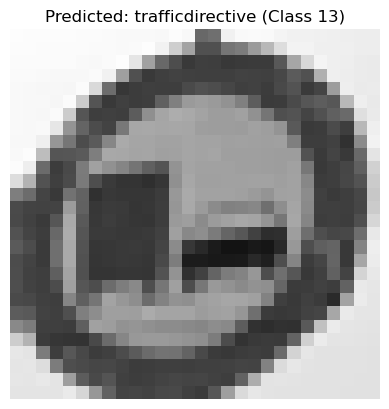

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


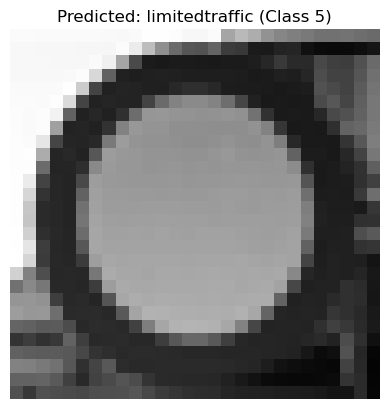

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


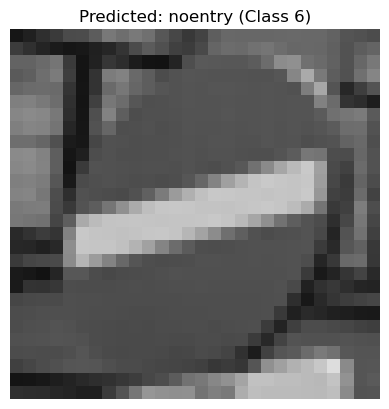

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


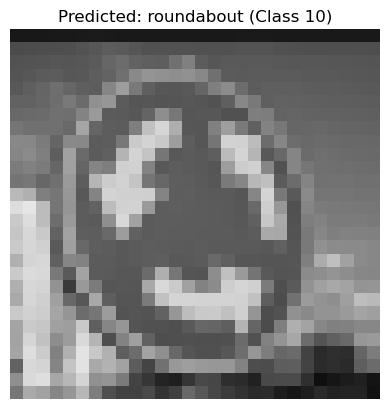

In [195]:
keras.config.enable_unsafe_deserialization()

root_folder_path = 'evaluation_images'

class_names = ['bicycle', 'continue', 'crossing', 'giveway','lane end','limitedtraffic', 'noentry','noparking','parking','rightofway','roundabout','speed',
               'stop','trafficdirective','traveldirection' , 'warning']

def preprocess_image(image_path):
    """Load and preprocess an image."""
    img = image.load_img(image_path, target_size=(28, 28))  
    img_array = image.img_to_array(img)
    img_array /= 255.0  
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array, img

def predict_image_class(model, image_path):
    """Predict the class of an image using the given model."""
    img_array, img = preprocess_image(image_path)
    predictions = model_leNet_aug.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    return predicted_class_idx, class_names[predicted_class_idx], img

# getting images from subfolders
image_files = []
for dirpath, dirnames, filenames in os.walk(root_folder_path):
    for filename in filenames:
        if filename.lower().endswith(('.png')):
            image_files.append(os.path.join(dirpath, filename))

# Randomly select 5 images
selected_images = random.sample(image_files, min(10, len(image_files)))  # Ensure not to exceed the list length

# Predict the class for each selected image and display the image
for img_file in selected_images:
    predicted_class_idx, predicted_class_name, img = predict_image_class(model_leNet_aug, img_file)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name} (Class {predicted_class_idx})")
    plt.axis('off')
    plt.show()

### Prediction and Accuracy of Independent Images - Sign Type Classification

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Image Path: evaluation_images/round/roundabout/raoundabout.png
Predicted Class: 10 (roundabout)
Actual Class: 10 (roundabout)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image Path: evaluation_images/round/noparking/noparking_1.png
Predicted Class: 10 (roundabout)
Actual Class: 7 (noparking)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image Path: evaluation_images/round/bicycle/bicycle_1.png
Predicted Class: 0 (bicycle)
Actual Class: 0 (bicycle)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Image Path: evaluation_images/round/noentry/noentry_2.png
Predicted Class: 6 (noentry)
Actual Class: 6 (noentry)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image Path: evaluation_images/round/noentry/noentry_4.png
Predicted Class: 6 (noentry)
Actual Class: 6 (noentry)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Image Path: evaluation_images/round/noentry/noentry_3.png
Predicted Class: 6 (noentry)
Actual Class: 6 (noentry)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image Path: evaluation_imag

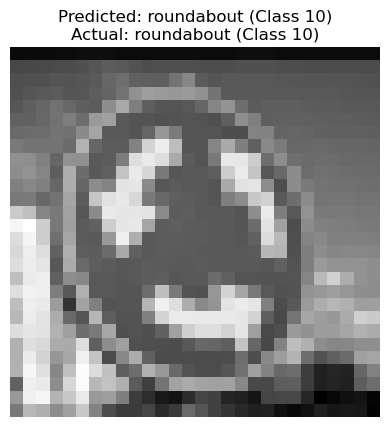

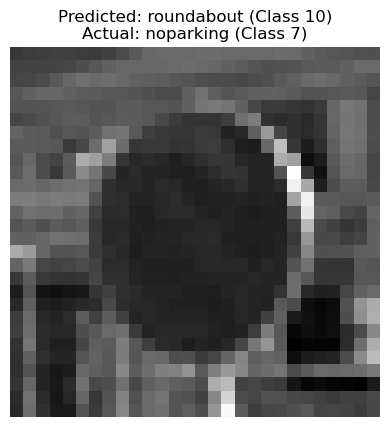

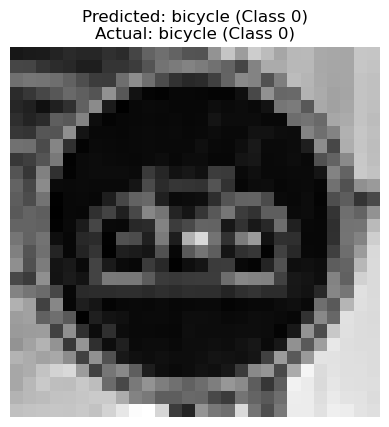

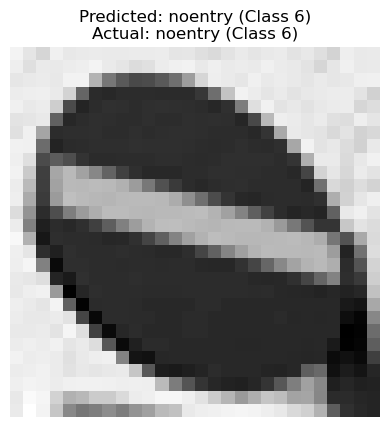

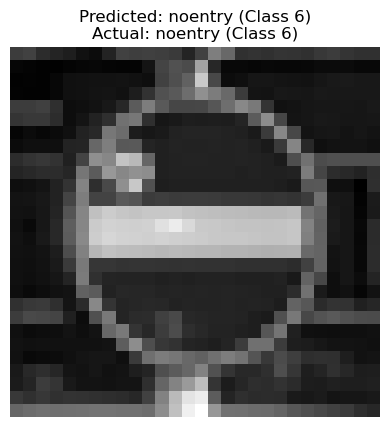

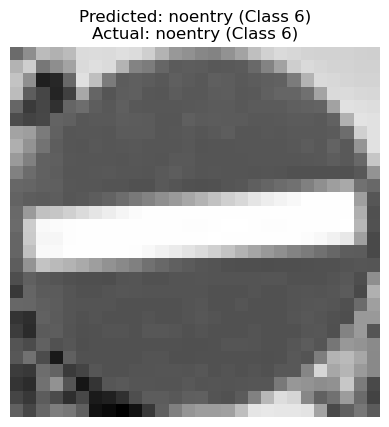

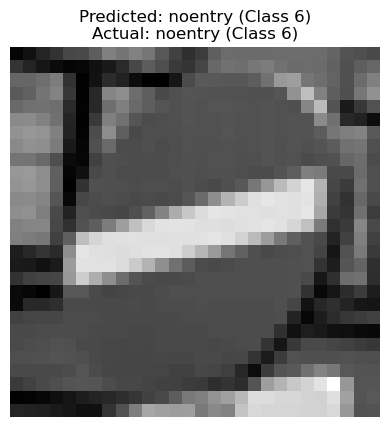

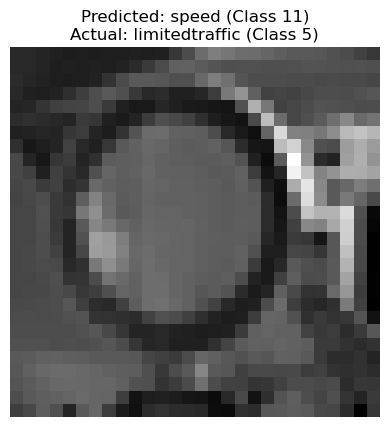

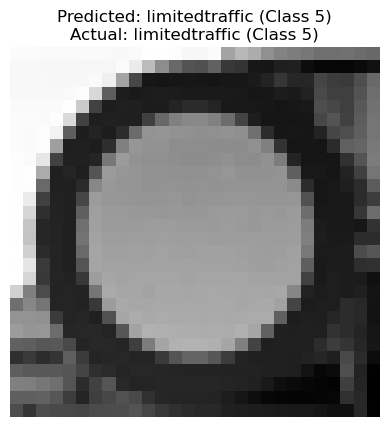

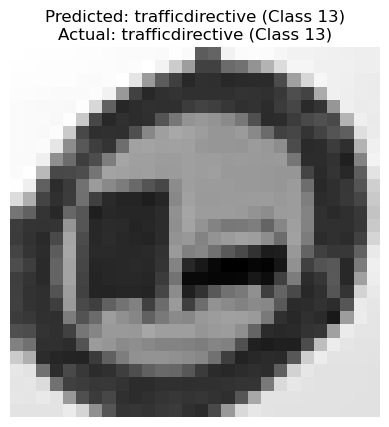

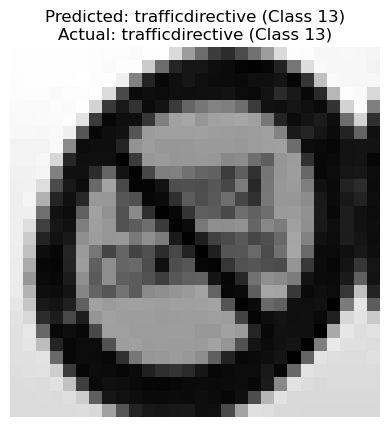

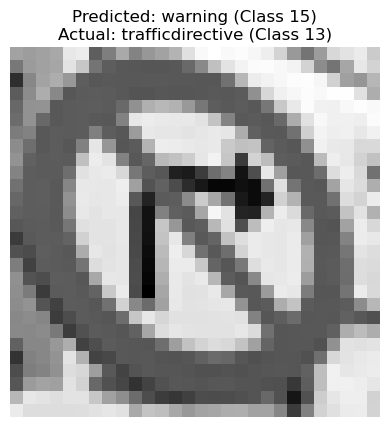

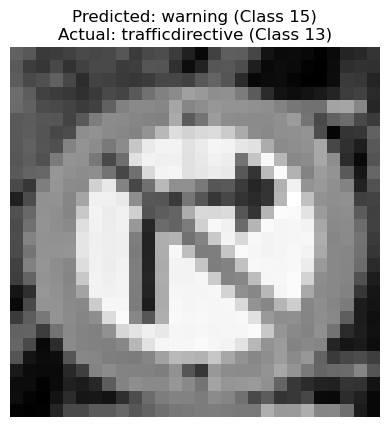

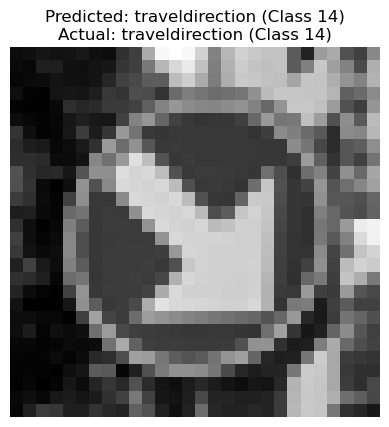

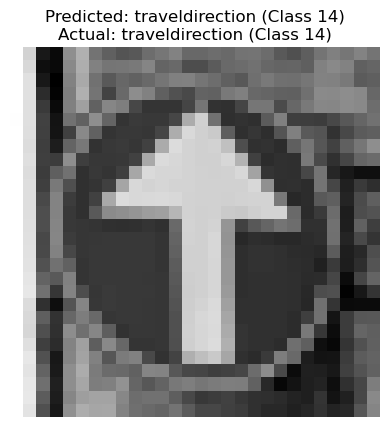

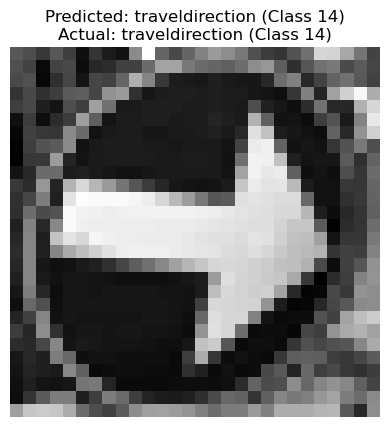

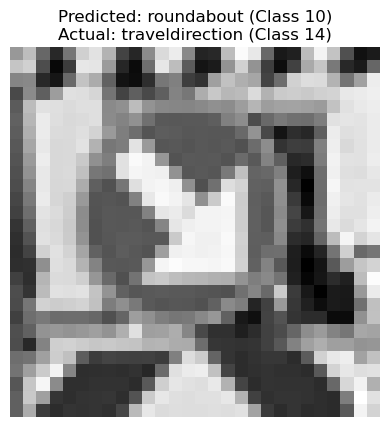

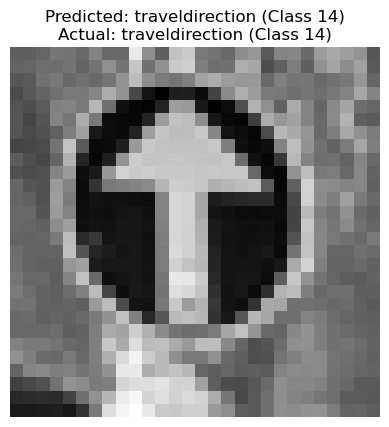

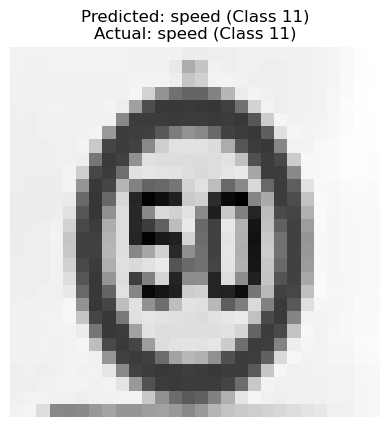

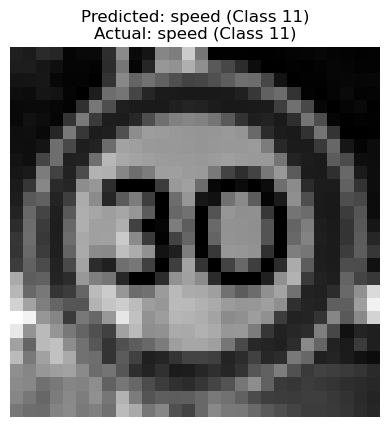

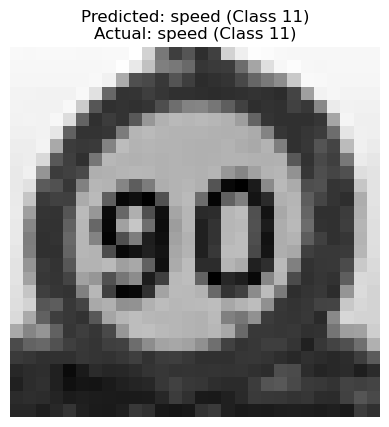

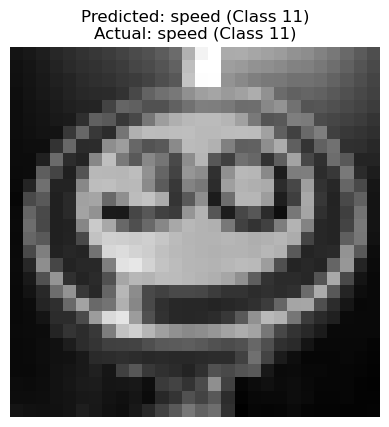

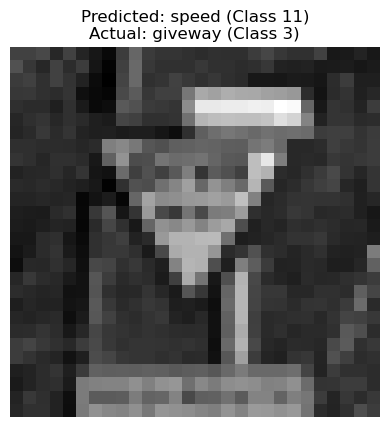

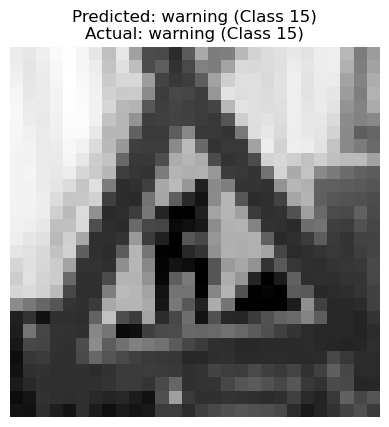

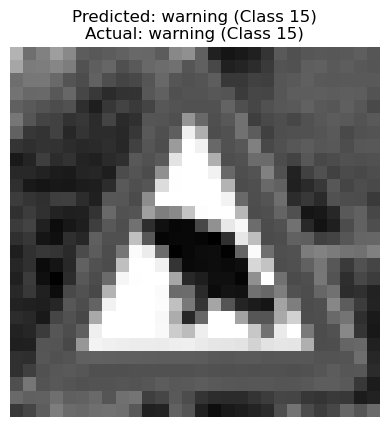

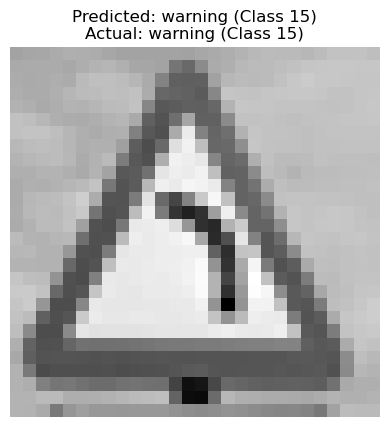

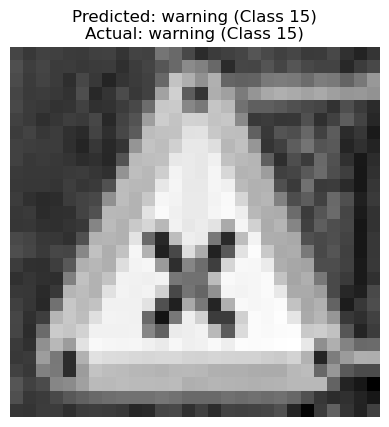

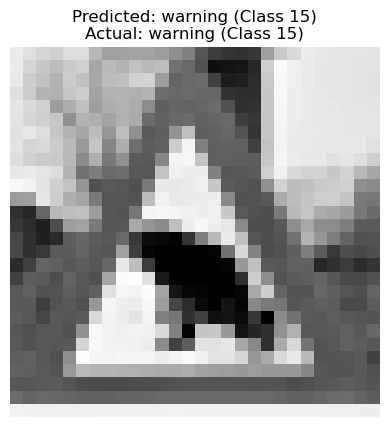

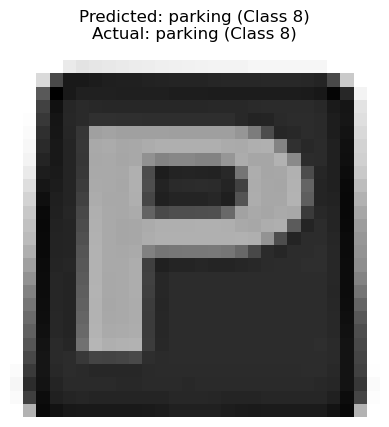

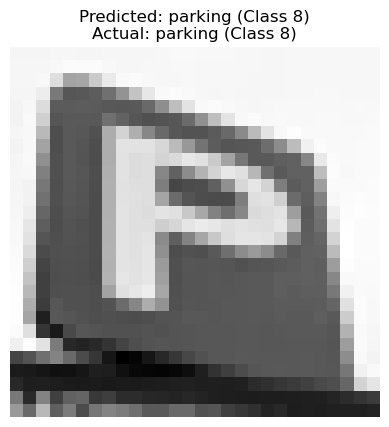

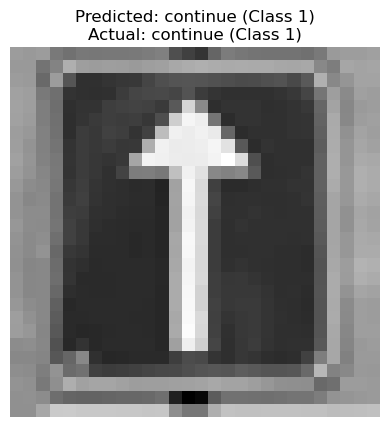

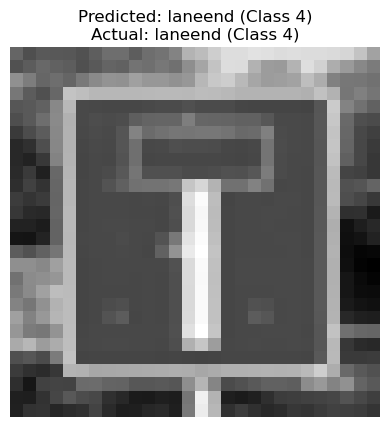

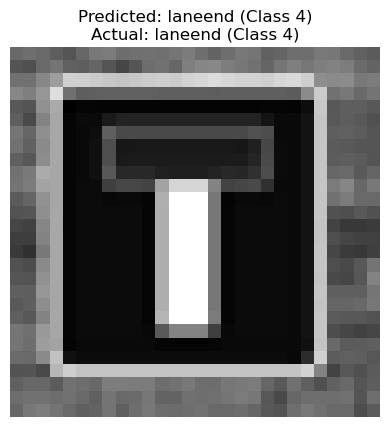

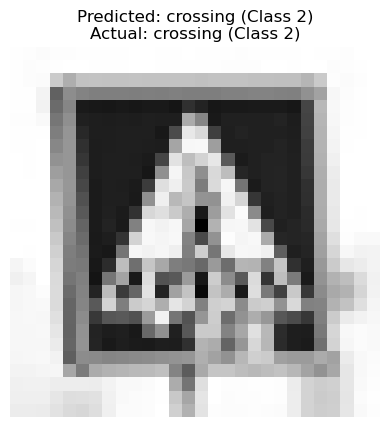

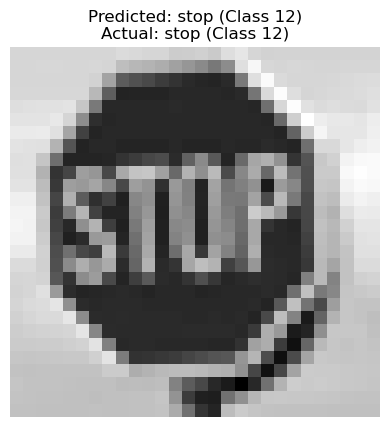

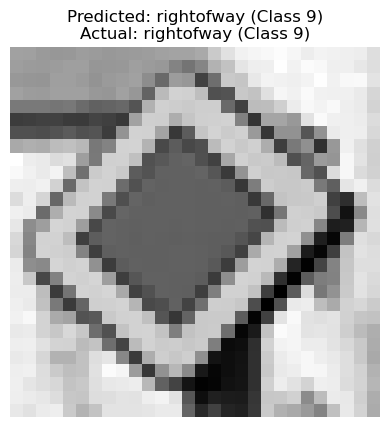

In [201]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# classes in alphabet
class_names = ['bicycle', 'continue', 'crossing', 'giveway','laneend','limitedtraffic', 'noentry','noparking','parking','rightofway','roundabout','speed',
               'stop','trafficdirective','traveldirection' , 'warning']

def preprocess_image(image_path):
    """Load and preprocess an image."""
    img = load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array /= 255.0
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array, img

def collect_all_images_and_labels(directory):
    """Collect all image paths and their corresponding labels."""
    image_files = []
    y_true = []
    for root, dirs, files in os.walk(directory):
        for subdir in dirs:
            subdir_path = os.path.join(root, subdir)
            images_in_subdir = [os.path.join(subdir_path, file) for file in os.listdir(subdir_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
            for image_path in images_in_subdir:
                image_files.append(image_path)
                y_true.append(class_names.index(subdir))
    return image_files, y_true

test_directory = 'evaluation_images'


image_files, y_true = collect_all_images_and_labels(test_directory)


y_pred = []

for img_file, true_label in zip(image_files, y_true):
    img_array, img = preprocess_image(img_file)
    predictions = model_leNet_aug.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    y_pred.append(predicted_class_idx)
    
    print(f"Image Path: {img_file}")
    print(f"Predicted Class: {predicted_class_idx} ({class_names[predicted_class_idx]})")
    print(f"Actual Class: {true_label} ({class_names[true_label]})\n")


accuracy = accuracy_score(y_true, y_pred)
print(f"Model Accuracy on Independent Dataset: {accuracy:.2f}")

#double check... print images as well
for img_file, predicted_idx, true_idx in zip(image_files, y_pred, y_true):
    img = load_img(img_file, color_mode='grayscale')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted: {class_names[predicted_idx]} (Class {predicted_idx})\nActual: {class_names[true_idx]} (Class {true_idx})")
    plt.show()